In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import random

In [2]:
# Connect to an R session
import rpy2.robjects
r = rpy2.robjects.r
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
from rpy2.robjects.environments import Environment
from rpy2.robjects import pandas2ri
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
#Specify path with downloaded R packages
lib_path = 'C:/Users/BUCKBEAK/Documents/BUCKBEAK/R/win-library/3.2'

# load some required packages
utils = importr('utils')
langR = importr('languageR', lib_loc=lib_path)
lme4 = importr('lme4', lib_path)
lmerTest=importr('lmerTest', lib_path)
mass = importr('MASS', lib_path)
#packages = importr('packages', lib_path)

First Round Of Hypotheses
- Results From Each Individual Variable

#####Varying Intercept Only
The significant predictors were:
- REM second night before
- REM weighted 2 days
- REM weighted 3 days
- REM weighted 4 days
- REM expo weighted 2 days
- Total sleep weighted 3 days

#####Varying Slope and Intercept
The significant predictors were:
- REM cycle count 2nd night before the race
- REM cycle count weighted 3 days
- REM cycle count weighted 4 days
- total sleep weighted 2 days
- total sleep weighted 3 days
- total sleep weighted 4 days
- total sleep weighted 5 days
- total sleep weighted 6 days
- REM sleep expo 2 nights
- REM sleep expo 3 nights
- REM sleep expo 4 nights

Therefore, I also added REM cycle count, REM sleep, and total sleep the night before and 2nd night before, as well as weighted 2, 3, and 4 days


In [3]:
sleeps2 = pd.read_csv('sleeps_temp_2.csv')
sleeps2 = sleeps2[['user_id', 'date_md', 'time_in_bed', 'latency', 'light_sleep_duration', 'slow_wave_sleep_duration',
                  'rem_sleep_duration', 'resting_heart_rate', 'hrv_rmssd', 'cycles_count']]
sleeps2['sleep_duration'] = sleeps2['light_sleep_duration'] + sleeps2['rem_sleep_duration'] + sleeps2['slow_wave_sleep_duration']

In [4]:
#Convert Units
sleeps2['time_in_bed'] = sleeps2['time_in_bed'].divide(60000.0)
sleeps2['light_sleep_duration'] = sleeps2['light_sleep_duration'].divide(60000.0)
sleeps2['slow_wave_sleep_duration'] = sleeps2['slow_wave_sleep_duration'].divide(60000.0)
sleeps2['rem_sleep_duration'] = sleeps2['rem_sleep_duration'].divide(60000.0)
sleeps2['sleep_duration'] = sleeps2['sleep_duration'].divide(60000.0)
sleeps2['latency'] = sleeps2['latency'].divide(60000.0)

In [6]:
sleeps2.head()

,user_id,date_md,time_in_bed,latency,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,resting_heart_rate,hrv_rmssd,cycles_count,sleep_duration
0,828,15-Sep,567.00000,35.002200,370.5,60.0,22.0,49,0.064647,2,452.5
1,828,16-Sep,603.00000,46.502233,381.0,53.5,58.0,45,0.075670,3,492.5
2,828,17-Sep,699.00000,130.007833,428.0,54.0,43.0,44,0.036925,4,525.0
3,828,18-Sep,585.83545,23.500700,413.5,36.0,70.5,53,0.098787,7,520.0
4,828,20-Sep,485.93915,26.001250,301.5,48.5,65.0,43,0.050816,6,415.0


In [7]:
#Overall Mean
print 'Latency Mean: ', np.mean(sleeps2['latency']) 
print 'Latency STD:', np.std(sleeps2['latency'])
print 'Time In Bed Mean: ', np.mean(sleeps2['time_in_bed']) 
print 'Time In Bed STD: ', np.std(sleeps2['time_in_bed'])
print 'Total Sleep Duration Mean: ', np.mean(sleeps2['sleep_duration']) 
print 'Total Sleep Duration STD: ', np.std(sleeps2['sleep_duration'])
print 'Light Sleep Duration Mean: ', np.mean(sleeps2['light_sleep_duration']) 
print 'Light Sleep Duration STD: ', np.std(sleeps2['light_sleep_duration'])
print 'REM Sleep Duration Mean: ', np.mean(sleeps2['rem_sleep_duration']) 
print 'REM Sleep Duration STD: ', np.std(sleeps2['rem_sleep_duration'])
print 'Slow Wave Sleep Duration Mean: ', np.mean(sleeps2['slow_wave_sleep_duration']) 
print 'Slow Wave Sleep Duration STD: ', np.std(sleeps2['slow_wave_sleep_duration'])
print 'REM Cycle Count Mean: ', np.mean(sleeps2['cycles_count']) 
print 'REM Cycle Count STD: ', np.std(sleeps2['cycles_count'])
print '****************************************************************************************************'
print 'Resting Heart Rate Mean: ', np.mean(sleeps2['resting_heart_rate']) 
print 'Resting Heart Rate STD: ', np.std(sleeps2['resting_heart_rate'])
print 'HRV Mean: ', np.mean(sleeps2['hrv_rmssd']) 
print 'HRV STD: ', np.std(sleeps2['hrv_rmssd'])

Latency Mean:  19.3946975457
Latency STD: 10.927461307
Time In Bed Mean:  543.146848031
Time In Bed STD:  78.1850134668
Total Sleep Duration Mean:  465.686643322
Total Sleep Duration STD:  71.1963828176
Light Sleep Duration Mean:  316.339040925
Light Sleep Duration STD:  88.0488595291
REM Sleep Duration Mean:  72.2773971461
REM Sleep Duration STD:  63.8241920826
Slow Wave Sleep Duration Mean:  77.0702052511
Slow Wave Sleep Duration STD:  41.3127609027
REM Cycle Count Mean:  5.20034246575
REM Cycle Count STD:  2.88286147667
****************************************************************************************************
Resting Heart Rate Mean:  46.6712328767
Resting Heart Rate STD:  5.70701273614
HRV Mean:  0.0967648335616
HRV STD:  0.0425443451004


In [8]:
group_sleeps = sleeps2.groupby(['user_id']).mean().reset_index()

In [9]:
group_sleeps

,user_id,time_in_bed,latency,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,resting_heart_rate,hrv_rmssd,cycles_count,sleep_duration
0,828,600.604588,23.438555,348.918033,98.631147,56.122951,46.180328,0.073060,5.459016,503.672131
1,2439,484.288686,19.701102,316.617187,63.320312,52.757812,45.578125,0.138526,4.343750,432.695312
2,2456,516.659591,16.151722,321.118182,72.845455,51.181818,45.400000,0.080337,4.672727,445.145454
3,2458,562.775088,22.367106,262.904762,86.698412,125.126984,41.555556,0.132692,5.682540,474.730158
4,2465,531.170096,18.011432,284.962963,113.111111,63.796296,48.574074,0.101814,5.296296,461.870369
5,2466,537.801364,18.563642,264.593750,44.765625,111.328125,44.531250,0.143979,7.046875,420.687499
6,2468,575.560370,24.666511,330.258333,95.283333,68.533333,42.066667,0.063789,5.016667,494.074999
7,2469,560.196745,15.788015,396.531250,69.234375,40.523438,57.421875,0.049487,4.375000,506.289062
8,2473,533.617241,18.899535,239.153846,75.833333,136.064103,44.435897,0.119295,7.410256,451.051282
9,2508,523.258945,15.836878,368.791666,56.550000,35.500000,50.033333,0.067510,3.400000,460.841666


In [10]:
group_sleeps_std = sleeps2.groupby(['user_id']).std().reset_index()

In [11]:
group_sleeps_std

,user_id,time_in_bed,latency,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,resting_heart_rate,hrv_rmssd,cycles_count,sleep_duration
0,828,102.626305,16.789152,60.140404,49.050986,41.262741,2.843168,0.037697,2.947167,51.307235
1,2439,107.081974,7.188270,93.793117,33.982882,28.517189,2.605274,0.025501,2.418308,101.794011
2,2456,50.430791,6.510240,70.316346,31.938290,41.306819,2.985148,0.020337,2.449902,54.547098
3,2458,60.910665,15.316531,99.919518,31.916163,108.697270,2.434813,0.022623,3.577823,68.278711
4,2465,79.156902,7.654201,60.496519,45.366398,22.804237,5.160086,0.020939,2.142381,70.528544
5,2466,52.504355,6.901379,55.416882,27.646001,65.985281,4.378768,0.035983,2.983711,64.517778
6,2468,66.369339,13.091741,84.358320,42.373577,58.982249,2.392550,0.019870,2.368520,59.733931
7,2469,27.876891,6.849989,64.568400,34.931676,24.736617,3.702443,0.012926,2.791711,33.572452
8,2473,50.119441,11.397592,58.694252,31.266539,70.095628,3.330836,0.027101,2.413972,44.774258
9,2508,75.209934,7.211061,80.083500,29.350988,18.893098,4.430123,0.027518,2.132874,75.482600


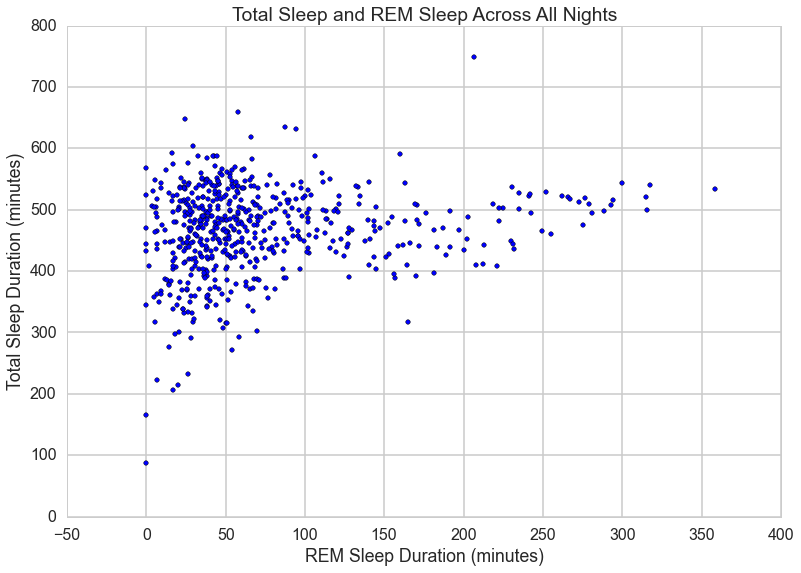

In [17]:
plt.scatter(sleeps2['rem_sleep_duration'], sleeps2['sleep_duration'])
plt.title('Total Sleep and REM Sleep Across All Nights')
plt.xlabel('REM Sleep Duration (minutes)')
plt.ylabel('Total Sleep Duration (minutes)')

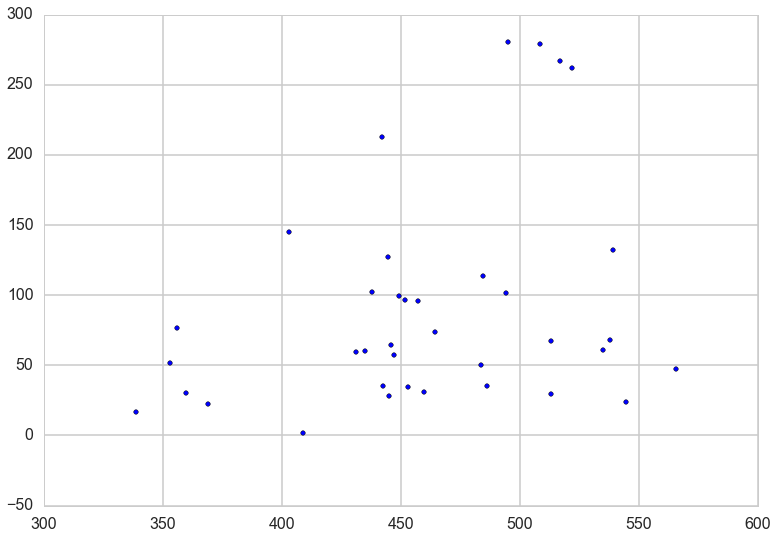

In [20]:
df = pd.read_csv('df_3.csv')

plt.scatter(df['total_sleep_Night_Before'], df['REM_Night_Before'])